# Loan Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("loan_data.csv")

In [4]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
data.rename({'not.fully.paid':'loan'},axis =1,inplace = True)
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,loan
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  loan               9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,loan
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
data.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

## OneHotCoder

In [9]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(data[['purpose']])
enc.categories_

[array(['all_other', 'credit_card', 'debt_consolidation', 'educational',
        'home_improvement', 'major_purchase', 'small_business'],
       dtype=object)]

In [10]:
onehot = enc.transform(data[['purpose']]).toarray()
onehot

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [11]:
cat_data = pd.DataFrame(onehot,columns=['all_other', 'credit_card', 'debt_consolidation', 'educational','home_improvement', 'major_purchase', 'small_business'])
cat_data.head()

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data_final = pd.concat([cat_data,data.drop('purpose',axis = 1)],axis = 1)

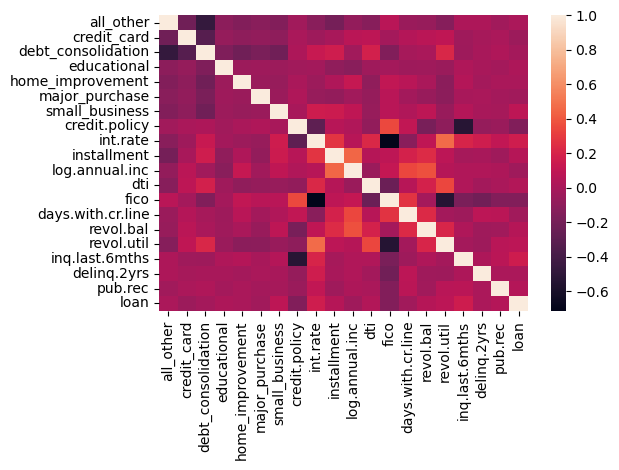

In [13]:
sns.heatmap(data_final.corr(),annot=False)
plt.tight_layout()

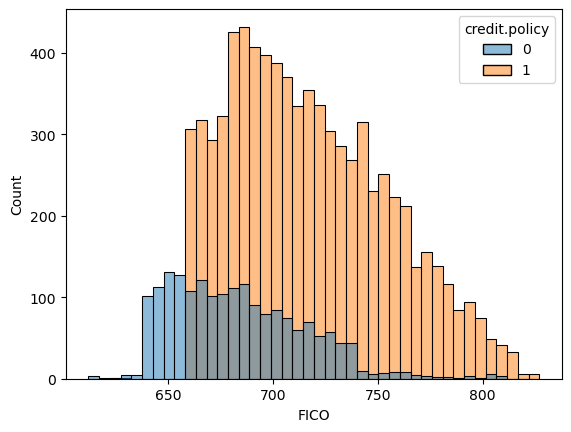

In [14]:
sns.histplot(data = data_final,x = 'fico',hue = 'credit.policy')
plt.xlabel('FICO')
plt.show()

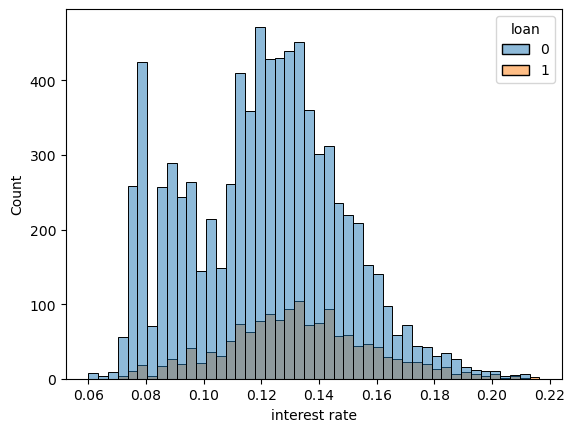

In [15]:
sns.histplot(data = data_final,x = 'int.rate',hue = 'loan')
plt.xlabel('interest rate')
plt.show()

## Standard Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
data_final.columns

Index(['all_other', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'major_purchase', 'small_business', 'credit.policy',
       'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'delinq.2yrs', 'pub.rec', 'loan'],
      dtype='object')

In [18]:
scaler = StandardScaler()
scaler.fit(data_final[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico','days.with.cr.line', 'revol.bal', 'revol.util']])

StandardScaler()

In [19]:
scaled_inputs = scaler.transform(data_final[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico','days.with.cr.line', 'revol.bal', 'revol.util']])
scaled_inputs

array([[-0.13931753,  2.46309947,  0.68038804, ...,  0.4322297 ,
         0.35373245,  0.18270369],
       [-0.57886837, -0.43885443,  0.2440308 , ..., -0.72123005,
         0.49501762,  1.03060231],
       [ 0.48648368,  0.23070836, -0.90865897, ...,  0.05976963,
        -0.39707277, -0.73068304],
       ...,
       [-0.57886837, -1.06867038, -0.54569448, ..., -0.44485963,
        -0.20376479,  1.24430034],
       [ 1.39166043,  0.1569135 , -0.18272998, ..., -1.10572219,
        -0.50108875, -1.50275334],
       [ 0.61685894,  2.58060136,  0.54059439, ...,  0.07178501,
         0.62110478,  0.35159406]])

In [20]:
non_scaled_df = data_final.drop(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico','days.with.cr.line', 'revol.bal', 'revol.util'],axis = 1)
non_scaled_df.head()

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,credit.policy,inq.last.6mths,delinq.2yrs,pub.rec,loan
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0


In [21]:
scaled_df = pd.DataFrame(scaled_inputs,columns = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico','days.with.cr.line', 'revol.bal', 'revol.util'])
scaled_df.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586


## Loan Final Data

In [22]:
loan_df = pd.concat([scaled_df,non_scaled_df],axis = 1)
loan_df.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,credit.policy,inq.last.6mths,delinq.2yrs,pub.rec,loan
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,0,0
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,0,0
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0


## X & y

In [23]:
X = loan_df.drop('loan',axis = 1)
y = loan_df['loan']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

### find best max_depth value

In [27]:
error_rate = []

for i in range(10,100):
    dtree = DecisionTreeClassifier(max_depth= i)
    dtree.fit(X_train,y_train)
    pred_i = dtree.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

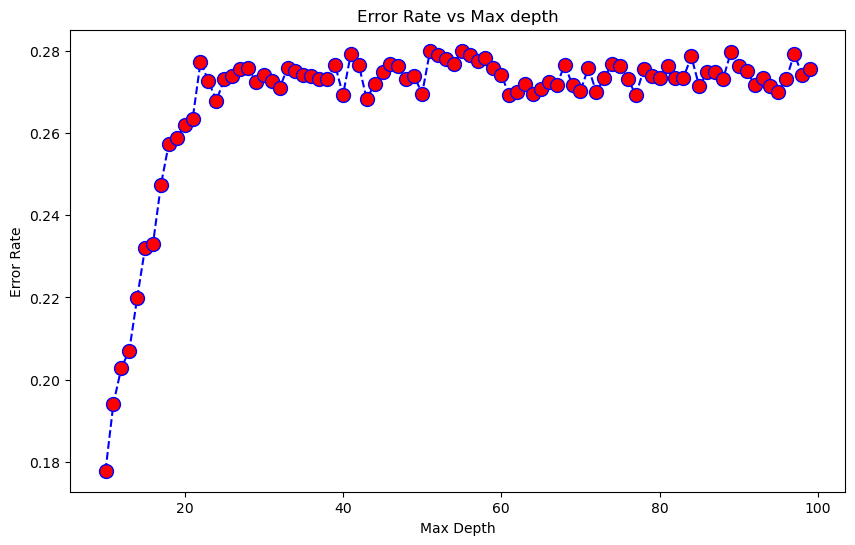

In [28]:
plt.figure(figsize = (10,6))
plt.plot(range(10,100),error_rate,color = 'blue',linestyle = 'dashed',marker = 'o',markerfacecolor = 'red',markersize = 10)
plt.title('Error Rate vs Max depth')
plt.xlabel('Max Depth')
plt.ylabel('Error Rate')
plt.show()

let's try setting max_depth = 6 and None

In [29]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

1) max_depth = None

In [57]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)
print('classification report:\n',classification_report(y_test,pred),'\n')
print('confusion matrix:\n',confusion_matrix(y_test,pred),'\n')
print('accuracy: ',accuracy_score(y_test,pred))

classification report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      2431
           1       0.19      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874
 

confusion matrix:
 [[1978  453]
 [ 335  108]] 

accuracy:  0.7258176757132916


2) max_depth = 6

In [58]:
dtree = DecisionTreeClassifier(max_depth=6)
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)
print('classification report:\n',classification_report(y_test,pred),'\n')
print('confusion matrix:\n',confusion_matrix(y_test,pred),'\n')
print('accuracy: ',accuracy_score(y_test,pred))

classification report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      2431
           1       0.28      0.04      0.06       443

    accuracy                           0.84      2874
   macro avg       0.56      0.51      0.49      2874
weighted avg       0.76      0.84      0.78      2874
 

confusion matrix:
 [[2390   41]
 [ 427   16]] 

accuracy:  0.837160751565762


## Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
error_rate = []

for i in range(10,100,10):
    rfc = RandomForestClassifier(n_estimators = i)
    rfc.fit(X_train,y_train)
    pred_i = rfc.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

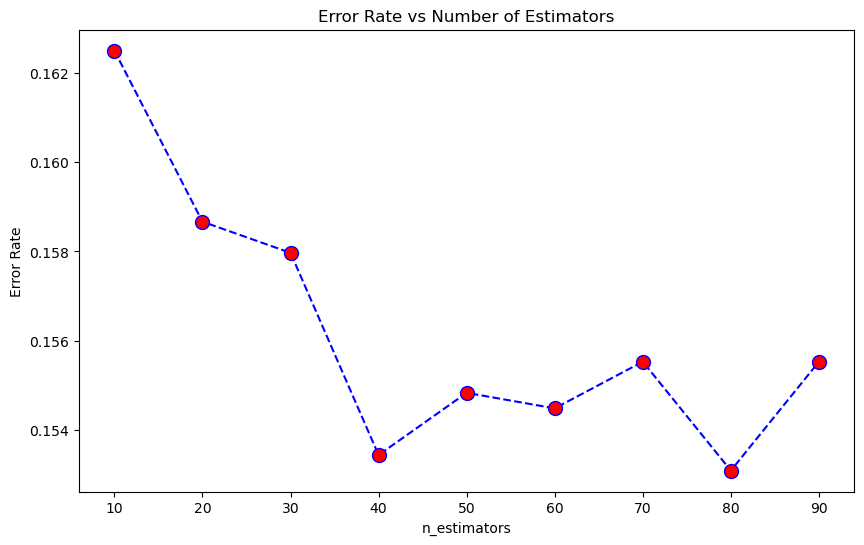

In [38]:
plt.figure(figsize = (10,6))
plt.plot(range(10,100,10),error_rate,color = 'blue',linestyle = 'dashed',marker = 'o',markerfacecolor = 'red',markersize = 10)
plt.title('Error Rate vs Number of Estimators')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')
plt.show()

```n_estimator``` = 80 has the least Error Rate, therefore:

In [59]:
rfc = RandomForestClassifier(n_estimators = 80)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
print('classification report:\n',classification_report(y_test,pred),'\n')
print('confusion matrix:\n',confusion_matrix(y_test,pred),'\n')
print('accuracy: ',accuracy_score(y_test,pred))

classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.52      0.03      0.06       443

    accuracy                           0.85      2874
   macro avg       0.68      0.51      0.49      2874
weighted avg       0.80      0.85      0.78      2874
 

confusion matrix:
 [[2419   12]
 [ 430   13]] 

accuracy:  0.8462073764787752


**Overall The ```RandomTreeClassifier``` model did better predicition than ```DecisionTreeClassifier``` model.**